# PREDICTING THE GOOGLE STOCK PRICE
- **Here is the link for the data
https://finance.yahoo.com/quote/GOOG/history?p=GOOG

# LOADING THE LIBRARIES

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import losses
from tensorflow.keras import optimizers as opt
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error

---
## 1. DATA PREPROCESSING

### 1.2 IMPORTING THE DATASET

In [2]:
dataset = pd.read_csv('google.csv')

In [3]:
# googleTrain = dataset.iloc[0:dataset.shape[0]-20,:]
# googleTest = dataset.iloc[dataset.shape[0]-20:dataset.shape[0],:]
# googleTrain.to_csv('googleTrain.csv',index=False)
# googleTest.to_csv('googleTest.csv',index=False)

In [4]:
googleTrain = pd.read_csv('googleTrain.csv')
googleTest = pd.read_csv('googleTest.csv')

### 1.2 DATA PREPROCESSING

In [5]:
# googleTrain
openTrain = np.array(googleTrain.iloc[:,1]).reshape(-1,1)
highTrain = np.array(googleTrain.iloc[:,2]).reshape(-1,1)
lowTrain = np.array(googleTrain.iloc[:,3]).reshape(-1,1)
closeTrain = np.array(googleTrain.iloc[:,4]).reshape(-1,1)
# googleTest
openTest = np.array(googleTest.iloc[:,1]).reshape(-1,1)
highTest = np.array(googleTest.iloc[:,2]).reshape(-1,1)
lowTest = np.array(googleTest.iloc[:,3]).reshape(-1,1)
closeTest = np.array(googleTest.iloc[:,4]).reshape(-1,1)

In [6]:
scale = MinMaxScaler()
def preprocessTrain(data,d):
    X_train = []
    Y_train = []
    data = scale.fit_transform(data)
    if d == 'X':
        for i in np.arange(80,data.shape[0]):
            X_train.append(data[i-80:i,0])
        X_train = np.array(X_train)
        X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
        return X_train
    elif d == 'Y':
        for i in np.arange(80,data.shape[0]):
            Y_train.append(data[i,0])
        Y_train = np.array(Y_train)
        return Y_train

In [7]:
def preprocessTest(data,s,l):
    data = np.array(data.iloc[data.shape[0]-googleTest.shape[0]-80:,s:l])
    X_test = []
    data = scale.transform(data)
    for i in np.arange(80,data.shape[0]):
        X_test.append(data[i-80:i,0])
    X_test = np.array(X_test)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)
    return X_test

In [8]:
# Open Stock Price
# train
trainOXS = preprocessTrain(openTrain,'X')
trainOYS = preprocessTrain(openTrain,'Y')
# test
testOXS = preprocessTest(dataset,1,2)

In [9]:
# High Stock Price
# train
trainHXS = preprocessTrain(highTrain,'X')
trainHYS = preprocessTrain(highTrain,'Y')
# test
testHXS = preprocessTest(dataset,2,3)

In [10]:
# Low Stock Price
# train
trainLXS = preprocessTrain(lowTrain,'X')
trainLYS = preprocessTrain(lowTrain,'Y')
# test
testLXS = preprocessTest(dataset,3,4)

In [11]:
# Close Stock Price
# train
trainCXS = preprocessTrain(closeTrain,'X')
trainCYS = preprocessTrain(closeTrain,'Y')
# test
testCXS = preprocessTest(dataset,4,5)

---
## 2. BUILDING THE RNN

In [12]:
# PACKAGES REQUIRED FOR RNN

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Dropout
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import load_model

In [13]:
def lstmRNN():
    regressor = Sequential()
    regressor.add(LSTM(units=70,return_sequences=True,input_shape=(80,1)))
    regressor.add(Dropout(rate=0.2))
    regressor.add(LSTM(units=70,return_sequences=True))
    regressor.add(Dropout(rate=0.2))
    regressor.add(LSTM(units=70,return_sequences=False))
    regressor.add(Dropout(rate=0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer=opt.Adam(),loss=losses.mean_squared_error)
    return regressor

In [16]:
# models = lstmRNN()
# regressor = {}
# regressor['open'] = models.fit(trainOXS,trainOYS,epochs=70,batch_size=40)
# regressor['high'] = models.fit(trainHXS,trainHYS,epochs=70,batch_size=40)
# regressor['low'] = models.fit(trainLXS,trainLYS,epochs=70,batch_size=40)
# regressor['close'] = models.fit(trainCXS,trainCYS,epochs=70,batch_size=40)
# regressor['open'].model.save('sModel/open.h5')
# regressor['high'].model.save('sModel/high.h5')
# regressor['low'].model.save('sModel/low.h5')
# regressor['close'].model.save('sModel/close.h5')

In [17]:
regressor['open'] = load_model('sModel/open.h5')
regressor['high'] = load_model('sModel/high.h5')
regressor['low'] = load_model('sModel/low.h5')
regressor['close'] = load_model('sModel/close.h5')

In [18]:
prediction = regressor['open'].predict(testOXS)

In [20]:
prediction = scale.inverse_transform(prediction)

In [21]:
prediction

array([[1297.6917],
       [1290.4595],
       [1293.4333],
       [1287.2411],
       [1297.2373],
       [1300.368 ],
       [1295.1326],
       [1291.2246],
       [1273.8555],
       [1297.4645],
       [1310.714 ],
       [1316.1792],
       [1320.5544],
       [1323.5702],
       [1330.8276],
       [1325.6316],
       [1328.2423],
       [1334.2018],
       [1338.9729],
       [1333.8065]], dtype=float32)

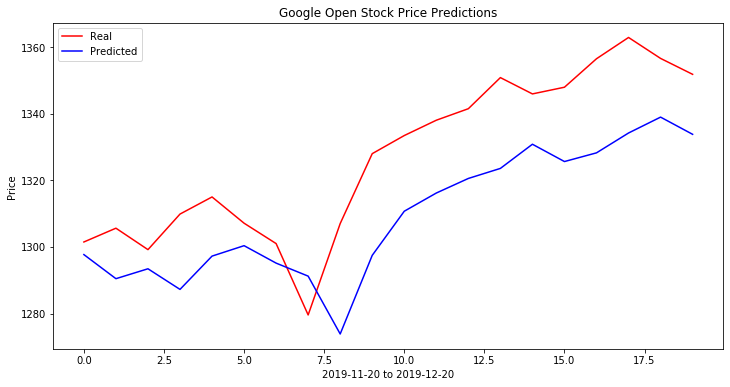

In [27]:
plt.figure(figsize=(12,6))
plt.plot(openTest,color='red', label='Real')
plt.plot(prediction,color='blue', label='Predicted')
plt.legend()
plt.title('Google Open Stock Price Predictions')
plt.xlabel('2019-11-20 to 2019-12-20')
plt.ylabel('Price')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(openTest,prediction))

In [34]:
print('{0} is RMSE'.format(rmse))

20.629779527421125 is RMSE
